In [1]:
from labeling import Labeling
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Binance API parameters
traded_assets = ['BTC', 'ETH', 'ADA', 'DOGE']
stable_assets = ['USDT']
start_date = "Jan 01, 2021"
end_date = "Dec 31, 2021"
time_horizons = ['1hr', '12hr']

# EMA parameters
alpha_values = [0.5]

# labeling parameters
trend_reversal_factors = [0.3, 0.6]
change_tolerances = [0.5, 1]
forward_terms = [5, 8]
break_away_points = [1, 2]

In [3]:
# data parameters
for traded_asset in traded_assets:
    for stable_asset in stable_assets:
        for time_horizon in time_horizons:
            for alpha_value in alpha_values:
                # labeling parameters
                for trend_reversal_factor in trend_reversal_factors:
                    for change_tolerance in change_tolerances:
                        for forward_term in forward_terms:
                            for break_away_point in break_away_points:
                                df = pd.read_csv(f"data/{traded_asset}_{stable_asset}_{time_horizon}_{alpha_value}_ema.csv")

                                df_labeled = Labeling(
                                    df = df,
                                    alpha = alpha_value,
                                    trend_reverse_factor = trend_reversal_factor,
                                    change_tolerance = change_tolerance,
                                    forward_term = forward_term,
                                    break_away_point = 2
                                )

                                df_labeled.label_long_utility()
                                df = df_labeled.df

                                df.to_csv(f"data/labeled/{traded_asset}_{stable_asset}_{time_horizon}_{alpha_value}_{trend_reversal_factor}_{change_tolerance}_{forward_term}_{break_away_point}_long_utility.csv")

In [4]:
df

,open,close,closeTime,close_ema,close_time_parsed,position,long_utility,long_utility_context,long_utility_context_ema
0,29029.04,29200.96,1.609535e+12,29139.460860,2021-01-01 20:59:59,NaN,2625.237524,0.975058,0.975058
1,29200.97,29160.39,1.609538e+12,29149.925433,2021-01-01 21:59:59,NaN,2614.772952,0.971235,0.972510
2,29163.17,29262.32,1.609542e+12,29206.122723,2021-01-01 22:59:59,NaN,2558.575662,0.949901,0.959591
3,29262.32,29331.69,1.609546e+12,29268.906365,2021-01-01 23:59:59,NaN,2495.792019,0.297157,0.606292
4,29331.70,29197.48,1.609549e+12,29233.193182,2021-01-02 00:59:59,NaN,2531.505203,0.424104,0.512260
...,...,...,...,...,...,...,...,...,...
8692,47514.16,47321.49,1.640873e+12,47338.178470,2021-12-30 13:59:59,NaN,200.875809,0.525503,0.572902
8693,47321.50,47345.03,1.640876e+12,47341.604235,2021-12-30 14:59:59,NaN,197.450044,0.523342,0.548122
8694,47345.02,47159.41,1.640880e+12,47250.507118,2021-12-30 15:59:59,NaN,288.547162,0.580801,0.564461
8695,47159.42,47578.69,1.640884e+12,47414.598559,2021-12-30 16:59:59,NaN,124.455721,0.477301,0.520881


In [10]:
df_plt = df#[:192]

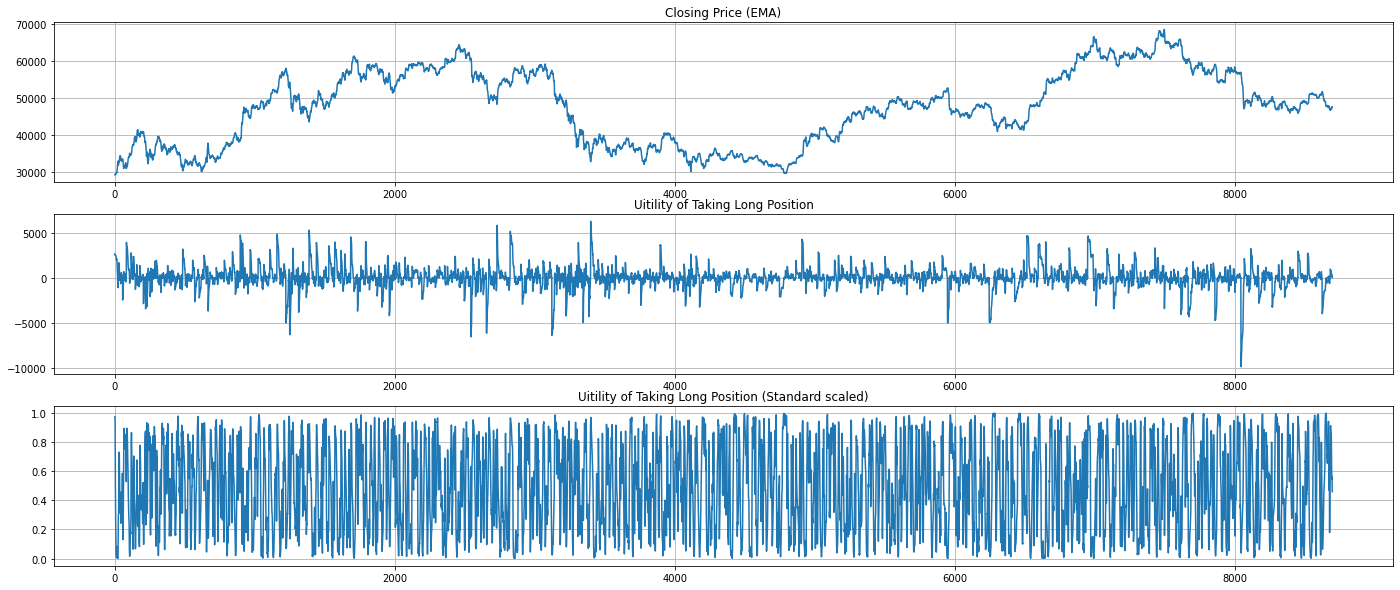

In [11]:
fig = plt.figure(
    figsize=(24, 10),
    facecolor="#ffffff",
)

plt.subplot(311)
plt.plot(df_plt['close_ema'])
plt.title('Closing Price (EMA)')
plt.grid()

plt.subplot(312)
plt.plot(df_plt['long_utility'])
plt.title('Uitility of Taking Long Position')
plt.grid()

plt.subplot(313)
# plt.plot(df_plt['long_utility'])
# plt.plot(df_plt['long_utility_context'])
plt.plot(df_plt['long_utility_context_ema'])
plt.title('Uitility of Taking Long Position (Standard scaled)')
plt.grid()